---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Сейчас все круто. Заказчику будут понятны выводы, у коллег будет минимум вопросов по коду. Проект засчитан, поздравляю!
</div>

---

---

<div class="alert alert-block alert-danger">
    

## Обновление

Спасибо за доработки, остался все еще вопрос по дубликатам заказов. Пример дубликатов ниже.
    
Можно удалить такие поворения, используя метод drop_duplicates, указав в списке столбцов customer_id, order_id, product.
</div>
    
---

In [156]:
data_clean[
    (data_clean.customer_id == '1d6c8c1f-a799-4418-9af2-1ded47d7a85c') & 
    (data_clean.order_id == 14833) & 
    (data_clean['product'] == 'Рассада Кабачка сорт Зебра кассета 6 шт E6')]

,date,customer_id,order_id,product,quantity,price,month,week,day,turnover


---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Привет! Спасибо за проект. Ход решения выбран совершенно верно. Однако, очень не хватает предобработки данных. Добавил комментарии в красных блоках что можно проверить. Предобработка может сильно изменить все дальнейшие результаты.
</div>
    
---

## E-commerce — Анализ товарного ассортимента

### Описание проекта

Для интернет-магазина товаров для дома «Пока все ещё тут» необходимо провести анализ товарного ассортимента, а также составить профиль покупателей. Следует определить самые прибыльные и самые популярные товары. Выделить категорию товаров для продвижения и для исключения из ассортимента. Предложить рекомендации для оптимизации ассортимента товаров.


### Материалы:

* [Презентация](https://1drv.ms/b/s!Ao-uCSnRVdO4ggM_9KBg5SxjcZ3i?e=gnZ5X8)

* [Дашборд по набору №1](https://public.tableau.com/profile/inna.khvan#!/vizhome/Sales_quantity/Dashboard1?publish=yes)

### Содержание

1. [Подготовка данных](#start)
2. [Анализ данных](#analysis)
3. [Проверка статистических гипотез](#hypothesis)
4. [Общий вывод](#output)


<a id="start"></a>
### 1. Подготовка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import datetime as dt
import scipy.stats as stats
from scipy import stats as st
import math as mth
pd.set_option('display.max_colwidth', -1)

Откроем и изучим файл с данными, удалив точку с запятой в последнем столбце.


In [4]:
data = pd.read_csv('/datasets/ecommerce_dataset.csv', comment=';', sep=',')
display(data.head())
data.info()
data.duplicated().sum()


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1.0,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1.0,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1.0,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1.0,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1.0,112.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6736 non-null float64
price          6736 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 315.9+ KB


0

Проверим количество пропусков

In [5]:
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       1
price          1
dtype: int64

В датасете 6 столбцов и 6 737 строк. По одному пропуску есть в столбцах quantity и price, количество пропусков несущественно, поэтому их можно удалить.
Типы данных: "целые числа", "вещественные числа" и "строчные". Необходимо изменить с "целого" на "временной" в столбце с датой. 

Названия столбцов:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Удаляем 1 пропущенную строку 

In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6736 entries, 0 to 6736
Data columns (total 6 columns):
date           6736 non-null int64
customer_id    6736 non-null object
order_id       6736 non-null int64
product        6736 non-null object
quantity       6736 non-null float64
price          6736 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 368.4+ KB


Изменим тип данных в столбце date на временной.

Сначала переведем целочисленный в строчный тип данных, затем из строчного в тип данных 'дата и время'.

In [7]:
data['date'] = data['date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d%S'))

In [8]:
display(data.head())

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1.0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1.0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1.0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1.0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1.0,112.0


Выделим дни, месяцы и недели в отдельные столбцы 

In [9]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [10]:
data['week'] = pd.DatetimeIndex(data['date']).week

In [11]:
data['day'] = pd.DatetimeIndex(data['date']).date

Рассчитаем выручку магазина и добавим столбец “turnover”.

In [12]:
data['turnover'] = data['price'] * data['quantity']

Проверим данные на аномальные значения.

In [13]:
data.describe()

,order_id,quantity,price,month,week,turnover
count,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000,6736.000000
mean,43124.828385,2.501781,462.059382,6.416271,26.056413,720.164192
std,27899.436180,15.267601,871.357059,3.035371,13.191900,8352.718689
min,12624.000000,1.000000,9.000000,1.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000,4.000000,17.000000,120.000000
50%,68503.000000,1.000000,135.000000,6.000000,23.000000,162.000000
75%,70503.250000,1.000000,399.500000,9.000000,40.000000,600.000000
max,73164.000000,1000.000000,14917.000000,12.000000,52.000000,675000.000000


В столбце quantity минимальное значение - 1, максимальное - 1 000 шт., но 75% значений столбца равно 1, и среднее равно 2-м. 
В столбце turnover диапазон значенийот 9 до 675 000, 75% значений равно 600, ср.значение равно 720.
Необходимо проверить данные столбцы на выбросы.


(0, 200)

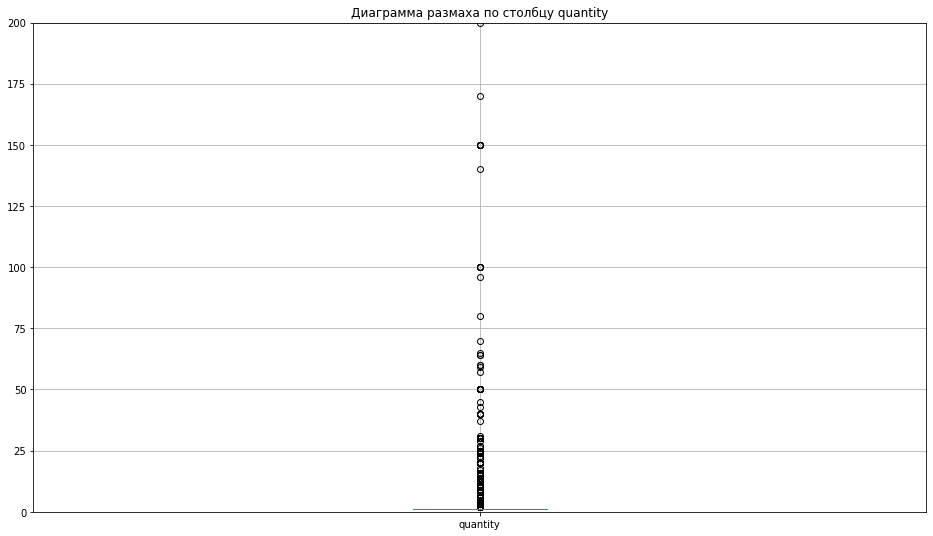

In [14]:
plt.figure(figsize=(16,9))
data.boxplot('quantity')
plt.title('Диаграмма размаха по столбцу quantity')
plt.ylim(0,200)


После 2.5 встречаются редкие значения до 200. Количество, равное 300, 350 и 1000, встречается только по одному разу. Основной показатель 1, но до 200 есть много однократных показателей. Необходимо отсечь выбросы после 200.

Проверим выбросы по turnover

(0, 2000)

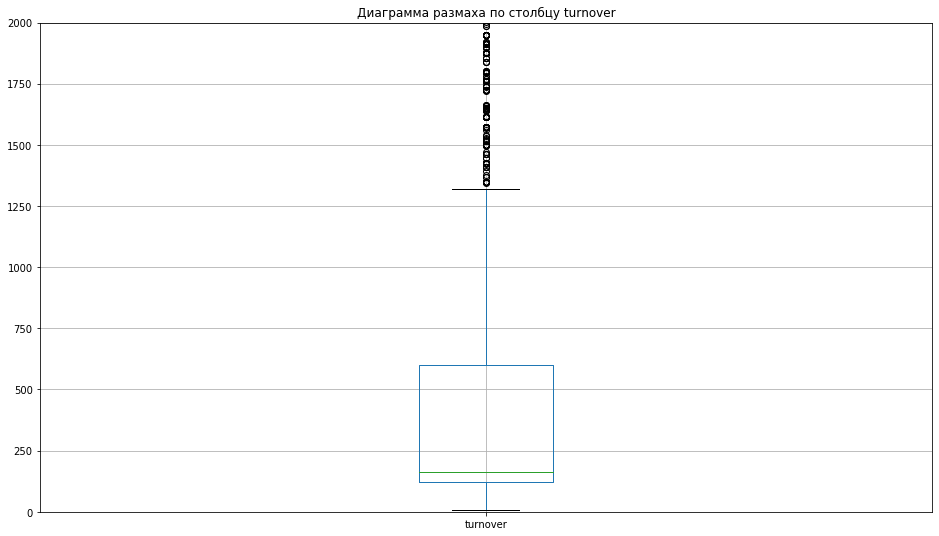

In [15]:
plt.figure(figsize=(16,9))
data.boxplot('turnover')
plt.title('Диаграмма размаха по столбцу turnover')
plt.ylim(0,2000)

Выручка 675 000 была всего один раз. Диапазон основных значений 170-600. Необходимо отсечь выбросы после 1300.

Очистим данные от выбросов

In [62]:
data_clean = data.query('quantity <= 200 and turnover <= 1300')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 0 to 6736
Data columns (total 10 columns):
date           5925 non-null datetime64[ns]
customer_id    5925 non-null object
order_id       5925 non-null int64
product        5925 non-null object
quantity       5925 non-null float64
price          5925 non-null float64
month          5925 non-null int64
week           5925 non-null int64
day            5925 non-null object
turnover       5925 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 509.2+ KB


 Мы удалили 811 строк датасета, что составляет 12% всей информации.

Некоторые заказы и товары повторяются в разные даты, возможно это отслеживание разных статусов продажи товара.

Узнаем, сколько должно быть уникальных дат и удалим дубликаты.

In [63]:
data_clean['date'].nunique()

2140

In [64]:
data_clean['date'].duplicated().sum()

3785

In [65]:
data_clean['date'] = data_clean['date'].drop_duplicates()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Узнаем, сколько должно быть уникальных заказов и покупателей, и удалим дубликаты

In [66]:
data_clean['order_id'].nunique()

2159

In [67]:
data_clean['customer_id'].nunique()

1913

In [68]:
data_clean['order_id'].duplicated().sum()

3766

In [69]:
data_clean['customer_id'].duplicated().sum()

4012

In [70]:
data_clean['order_id'] = data_clean['order_id'].drop_duplicates()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
data_clean['customer_id'] = data_clean['customer_id'].drop_duplicates()
 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5925 entries, 0 to 6736
Data columns (total 10 columns):
date           2140 non-null datetime64[ns]
customer_id    1913 non-null object
order_id       2159 non-null float64
product        5925 non-null object
quantity       5925 non-null float64
price          5925 non-null float64
month          5925 non-null int64
week           5925 non-null int64
day            5925 non-null object
turnover       5925 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 509.2+ KB


Должно остаться 2 140 уникальных дат. 3 785 дубликатов мы удалили.

---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Давай проверим выбросы в данных. Например, по столбцам turnover и quantity.
</div>
    
---

Мы изучили и очистили предоставленные данные, удалив пустые строки. У нас осталось 5 925 строк. Изменили типы данных  в столбце date. Откорректировали название и содержание столбца price, убрав лишний символ ';'  при открытии файла. 
Обнаружили и удалили выбросы в столбцах quantity (после 200) и turnover (после 1 300).
Удалили дубликаты в столбце дата.
Добавили столбец с выручкой, рассчитанной на основании данных по цене товара и его количеству в столбцах price и quantity, а также отдельные столбцы day, month и week.

---

<div class="alert alert-block alert-danger">
    

## Комментарий от наставника

Посмотри, пожалуйста, еще такой момент: некоторые заказы и товары повторяются в разные даты (см. код ниже). Скорее всего это отслеживание разных статусов заказов вроде "Создан", "Оплачено", "Доставлен" итп (но без указания статуса). Давай сделаем что-нибудь с этими дубликатами. А то дальнейшие вычисления могут сильно искажаться.
</div>
    
---

In [73]:
data_clean.groupby(['customer_id', 'order_id', 'product']).count().sort_values('date', ascending=False).head(20)

,,,date,quantity,price,month,week,day,turnover
customer_id,order_id,product,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,14943.0,Пеларгония зональная диам. 12 см темнорозовая полумахровая,1,1,1,1,1,1,1
a8b088ec-7c45-4dda-bc86-2ffcc861d8d8,14565.0,Пеларгония зональная диам. 12 см белая полумахровая,1,1,1,1,1,1,1
a868bebb-e4f4-494c-b7cb-ab03b88fe40b,69710.0,Плед флисовый 150х130 см WELLNESS WPLNY135-Зима_10 100 % полиэстер,1,1,1,1,1,1,1
a83b36dd-1906-4e1f-8387-5c38fcf76a10,69787.0,"Сковорода Scovo Дем Мт-029 алюминиевая без крышки с металической ручкой, 20 см",1,1,1,1,1,1,1
a7fd2907-8521-4d75-a5b0-231ad712483c,68636.0,"Вкладыши для хранения посуды 2 шт d-38 cm MARMITON, LG17056",1,1,1,1,1,1,1
a73ff6bd-0c51-485b-aaa5-2823f28cf361,72368.0,Тележка багажная DELTA DT-23 грузоподъемность 50 кг РОССИЯ,1,1,1,1,1,1,1
a6abc21d-5e9e-41db-9552-a942000ed5c2,69300.0,Тарелка обеденная КАШИМА ПУРПЛ 25 см G9324 Luminarc,1,1,1,1,1,1,1
a688224b-38c6-4fab-9d0e-f9c7b0ac6d13,72276.0,"Штора для ванной Spirella / Спирелла Peva Hugo, синий, полиэтилен, 180*200 см, 1001951",1,1,1,1,1,1,1
a6142764-478d-4357-bcbb-7f9bd35a98e5,14596.0,Базилик зеленый Тонус d-7 см,1,1,1,1,1,1,1


<a id="analysis"></a>
### 2. Анализ данных

По аналогии с АВС-анализом предлагаем провести параллельное разделение на товарные категории по следующим критериям:

- количество продаж
- цена
- оборот


__1). Определим количество продаж в натуральных единицах:__

a) общее и среднее количество продаж за весь период, месяц, неделю (показать в динамике на графике);

Определим, за какой период у нас данные.

In [74]:
data_clean['date'].max()

Timestamp('2019-10-31 00:00:16')

In [75]:
data_clean['date'].min()

Timestamp('2018-10-01 00:00:00')

Данные предоставлены за один год - с 01.10.2018 по 31.10.2019

Вычислим общее количество товаров 

In [76]:
total_quantity = data_clean['quantity'].sum()
print(f'Общее количество проданных товаров:', total_quantity)

Общее количество проданных товаров: 9719.0


In [77]:
total_quantity_unique = data_clean['product'].nunique()
print(f'Общее количество уникальных товаров:', total_quantity_unique)

Общее количество уникальных товаров: 1923


Узнаем среднее количество за месяц и построим график по количеству продаж в месяц, предварительно создадим сводную таблицу.

In [79]:
month_quantity = data_clean.groupby(['month']).agg({'quantity':'sum'}).reset_index()
print(f'Среднее количество проданных товаров в месяц:', month_quantity['quantity'].mean())
display(month_quantity.head)

Среднее количество проданных товаров в месяц: 809.9166666666666


<bound method NDFrame.head of     month  quantity
0   1      289.0   
1   2      733.0   
2   3      867.0   
3   4      1306.0  
4   5      1141.0  
5   6      1570.0  
6   7      590.0   
7   8      348.0   
8   9      314.0   
9   10     1247.0  
10  11     725.0   
11  12     589.0   >

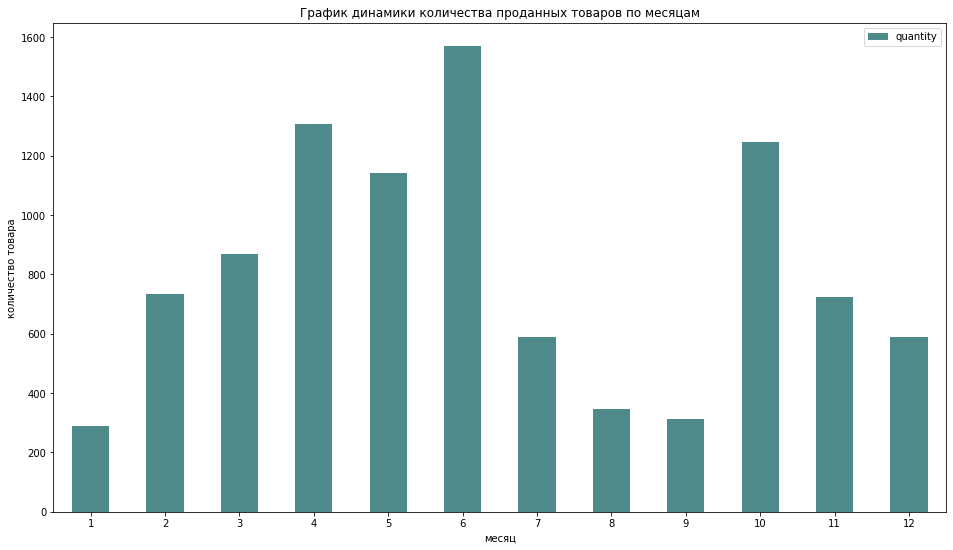

In [80]:
month_quantity.plot(kind='bar', x='month', title='График динамики количества проданных товаров по месяцам', figsize=(16, 9), color='#4f8a8b', legend=True)
sns.set_style("darkgrid")
plt.xlabel("месяц")
plt.ylabel("количество товара")
plt.tick_params(axis='x', labelsize = 10, labelrotation=360)



Больше всего продано товара в июне (около 1 570 шт.), октябре (1 2407 шт.) и апреле (1 300 шт.). Меньше всего: январь (289), август-сентябрь (314-348 шт. в месяц). Продажи последовательно растут до с февраля по июнь (с пиком выше среднего (809 шт. в месяц) апрель, июнь, октябрь), затем падают и следующий пик происходит в октябре. Возможно, это связано с весенними-осенними активностями покупателей в доме и саду.

Построим график динамики продаж по неделям

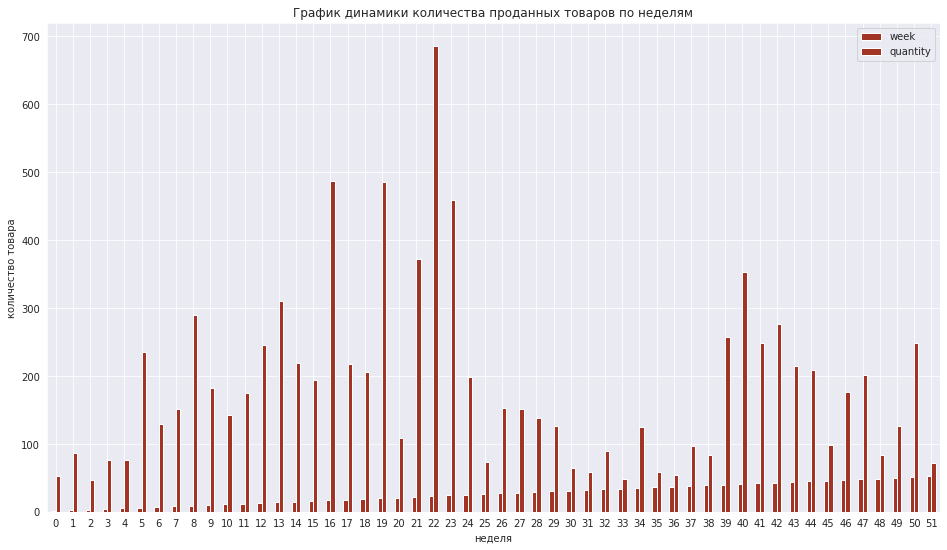

In [81]:
week_quantity = data_clean.groupby(['week']).agg({'quantity':'sum'}).reset_index()
week_quantity.plot(kind='bar',title='График динамики количества проданных товаров по неделям', figsize=(16, 9), color='#a23425', legend=True)
sns.set_style("darkgrid")
plt.xlabel("неделя")
plt.ylabel("количество товара")
plt.tick_params(axis='x', labelsize = 10, labelrotation=360)



In [82]:
print(f'Среднее количество проданных товаров в неделю:', week_quantity['quantity'].mean())

Среднее количество проданных товаров в неделю: 186.90384615384616


В среднем в неделю продается до 200 товаров. В пик сезона количество доходит до 700. Вне сезона продажи могут составляет менее 100.

b) какой товар самый/менее популярный (чаще/реже всего продается)?

Сгруппируем таблицу по продукту, сразу учитывая выручку и цену.

In [83]:
product_quantity = data_clean.groupby(['product']).agg({'quantity':'sum', 'turnover':'sum', 'price':'unique'}).reset_index().sort_values(by='quantity', ascending=False)

In [84]:
display(product_quantity)

,product,quantity,turnover,price
1350,"Стяжка оконная с болтом СТ-55 цинк, 1108354",112.0,2184.0,"[19.0, 20.0, 22.0]"
1640,Цветок искусственный Гвоздика пластиковая одиночная в ассортименте 50 см,96.0,2007.0,"[22.0, 21.0, 20.0]"
864,Пеларгония розебудная Red Pandora укорененный черенок,94.0,12670.0,"[135.0, 134.0, 149.0]"
3,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",93.0,5223.0,"[56.0, 59.0]"
543,"Крючок одежный двойной усиленный алюминиевый (дюраль), 1110015",90.0,2340.0,[26.0]
...,...,...,...,...
1295,Скатерть Meiwa FPLUS-PLAIN SARASA AZ BE прямоугольная152х228 см бежевая 5140 Meiwa,1.0,974.0,[974.0]
1297,Скатерть Ажурная d-ia Rose круглая д.152 белая 5173 Towa Co. LTd-,1.0,712.0,[712.0]
1298,Скатерть Жаклин 50% полиэфир 50% хлопок квадратная 140х140 см бежевая Wellness ML144-Жаклин*17,1.0,899.0,[899.0]
1299,"Скатерть Муза 100% полиэфир овальная 180х150 см сливочная с цветами, Wellness, WTO185-Муза*04",1.0,1012.0,[1012.0]


Самый популярный продукт - стяжка оконная (продано 112 шт.), а наименее популярный - подставка для цветов (1). Также в ТОП-3 искусственная Гвоздика (96 штук) и черенок Пеларгонии розебудной (94 штуки).


Разделим выборку на 3 категории(АВС) по количеству проданного товара. А- самые часто продаваемые, В - средние и С - реже продаваемые.

Сначала попробуем определить диапазон по количеству.

In [85]:
quantity_range = pd.qcut(product_quantity['quantity'], 4, duplicates='drop').value_counts()
display(quantity_range)


(0.999, 2.0]    1165
(4.0, 112.0]    446 
(2.0, 4.0]      312 
Name: quantity, dtype: int64

Мы видим, что до 2 единиц, продается 60% товара.

Посчитаем, сколько товара было продано только в единичном количестве

In [86]:
one_quantity = product_quantity.query('quantity == 1').count()
display(one_quantity)

product     854
quantity    854
turnover    854
price       854
dtype: int64

In [87]:
display(one_quantity / product_quantity['product'].count())

product     0.444098
quantity    0.444098
turnover    0.444098
price       0.444098
dtype: float64

44% уникального товара было продано в единичном количестве. Это должна быть отдельная группа.

Разобьем уникальные товары на  категории  по выявленному диапазону количества продаж

In [88]:
A_quantity = product_quantity.query('quantity >= 4')
A_quantity_count = A_quantity['quantity'].count()
A_quantity_mean = A_quantity_count / product_quantity['product'].count()
display(f'Кол-во товаров в категории А по количеству продаж: ', A_quantity_count)
display(f'Доля товаров в категории А по количеству продаж: ', A_quantity_mean)

'Кол-во товаров в категории А по количеству продаж: '

556

'Доля товаров в категории А по количеству продаж: '

0.2891315652626105

In [89]:
B_quantity = product_quantity.query('quantity >= 2 and quantity <= 3')
B_quantity_count = B_quantity['quantity'].count()
B_quantity_mean = B_quantity_count / product_quantity['product'].count()
display(f'Кол-во товаров в категории B по количеству продаж: ', B_quantity_count)
display(f'Доля товаров в категории B по количеству продаж: ', B_quantity_mean)

'Кол-во товаров в категории B по количеству продаж: '

513

'Доля товаров в категории B по количеству продаж: '

0.2667706708268331

In [90]:
C_quantity = product_quantity.query('quantity == 1')
C_quantity_count = C_quantity['quantity'].count()
C_quantity_mean = C_quantity_count / product_quantity['product'].count()
display(f'Кол-во товаров в категории С по количеству продаж: ', C_quantity_count)
display(f'Доля товаров в категории С по количеству продаж: ', C_quantity_mean)

'Кол-во товаров в категории С по количеству продаж: '

854

'Доля товаров в категории С по количеству продаж: '

0.44409776391055644

**Таким образом, можно разделить товар по количеству на следующие группы:**

- А - часто продаваемые 4-112 шт.

- В - средние по количеству продаж 2-3 шт.

- С - реже продаваемые 1 шт.

Самая крупная по количеству товаров - категория С (854 наименования и 44% от всех товаров), самая небольшая категория В (513 наименований и доля 27%). Необходимо увеличивать количество продаж в категории С.

__2).  Выяснить структуру цены ассортимента:__

a) товары по ценовому диапазону. Какой самый дорогой и самый дешевый товар?

Проверим по одной и той же цене продавались товары в течение года или нет?

In [91]:
price_nunique = data_clean.pivot_table(index=['product'], values='price', aggfunc={'price':'nunique'}).reset_index()
not_one_price = price_nunique.query('price >= 2')
display(not_one_price)

,product,price
3,"Ёрш унитазный с деревянной ручкой , Ваир 1712012",2
13,Аквилегия обыкновенная Барлоу микс объем 1 л,2
18,Алоэ Вера d-12 см h-25 см,2
25,Антуриум Тропик Найт НИДЕРЛАНДЫ 1 штука в упаковке,2
27,Антуриум андрианум Ванилла d-12 см,2
...,...,...
1753,Чехол для одежды Hausmann со стенкой из ПВХ и ручками 60х140 см синий HM-701402NG,2
1765,"Швабра многофункциональная, Rozenbal, R212522",2
1790,Штора для ванной комнаты 240х200 Verga белая текстильная 240х200 см 6040,2
1792,Штора для ванной комнаты Bacchetta Dama текстильная 180х200 см 3655,2


Около 193 товара имеют 2 цены. Узнаем количество товаров в датасете (не уникальных, т.к. товары могут быть разной комплектации и продаваться в течение года по разной цене)

In [92]:
total_product_quantity = data_clean['product'].count()
print(f'Количество товаров:', total_product_quantity)

Количество товаров: 5925


Узнаем самый дорогой и самый дешевый товар.

In [93]:
product_price = data_clean[['product', 'price']].sort_values(by='price', ascending=False)
display(product_price)

,product,price
729,"Набор фужеров для вина МАСКАРАД 6шт 250мл, G5544, Luminarc, Франция",1275.0
1005,"Корзина для белья KNIT 57 л темно-коричневая, Curver, 03676-X59-00",1274.0
5988,"Весы электронные кухонные Soehnle (круглые,20 см. стеклянные) серебро 5кг/1гр. 66161",1274.0
2990,"Весы электронные кухонные Soehnle (круглые,20 см. стеклянные) серебро 5кг/1гр. 66161",1274.0
1384,Набор столовых приборов 24 предмета FARANDOLE Domenik DM9635,1274.0
...,...,...
6378,Петрушка Итальянский гигант 2 г 4660010776553,10.0
2159,"Горох Амброзия 10,0 г 4660010772616",9.0
1069,"Алиссум (лобулярия) Снежные одежды 0,2 г 4650091480302",9.0
5642,"Алиссум (лобулярия) Снежные одежды 0,2 г 4650091480302",9.0


Самый дорогой товар - Набор фужеров для вина МАСКАРАД 6 шт (1 275 рублей), в тройке лидеров - Корзина для белья KNIT (1 274)  и Весы электронные кухонные Soehnle 1 274). Самые дешевые это семена - Львиного зева и Алиссума по 9 рублей.

Какова средняя цена товара? Вычислим медианное среднее, т.к. разница между самым дорогим и самым дешевым товаром очень большая и арифметическое среднее будет слишком высоким.


In [94]:
median_price = product_price['price'].median()
print(f'Средняя цена товара:', median_price)

Средняя цена товара: 127.0


(0, 1500)

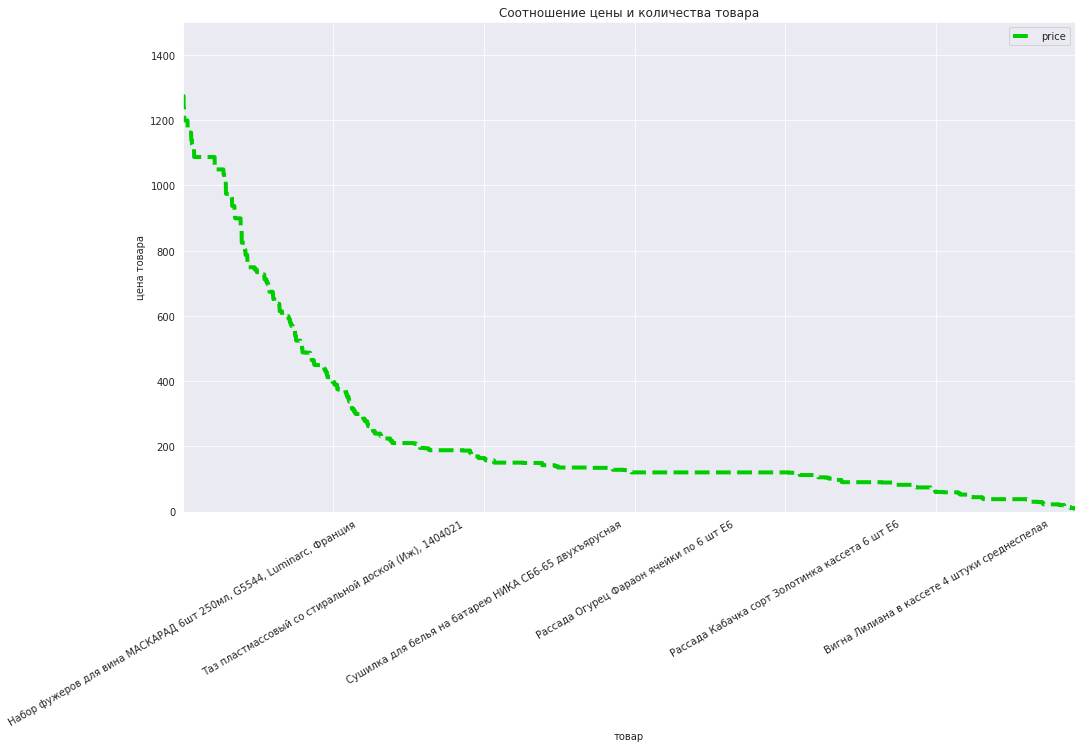

In [95]:
product_price.plot(kind='line', x = 'product', y='price', title='Соотношение цены и количества товара', 
                   figsize=(16, 9), color='#00cd00', linewidth=4.00, linestyle='--', legend=True)
sns.set_style("white")
plt.xlabel("товар")
plt.ylabel("цена товара")
plt.tick_params(axis='x', labelsize = 10, labelrotation=30)
plt.ylim(0, 1500)


Согласно графику можно сделать вывод, что дешевых товаров намного больше. Есть небольшая прослойка цены 1200-400. Все остальные товары ближе к 100-200.

Разделим товары по цене на 5 групп

In [96]:
price_range = pd.qcut(product_price['price'], 5).value_counts()
display(price_range)

(82.0, 120.0]      1748
(8.999, 82.0]      1199
(299.0, 1275.0]    1154
(149.0, 299.0]     1107
(120.0, 149.0]     717 
Name: price, dtype: int64

Теперь мы видим примерные ценовые диапазоны и можем их скорректировать с помощью графика и средней цены.

Мы можем разделить товары по ценовому диапазону на следующие 5 групп:
1. Самые дорогие:   300-1 275 р.
2. Дорогие:         149-299 р.
3. Средние:         120-148 р.
4. Дешевые:         82-119 р.
5. Самые дешевые:   9-81 р.

Медианная средняя цена 127 р как раз входит в средний ценовой диапазон, поэтому данная разбивка корректна.

b) какова доля по количеству продаж самых дорогих и самых дешевых товаров?

In [97]:
most_expensive = product_price.query('price >= 300 and price <= 1275').count() 
display(most_expensive)

product    1154
price      1154
dtype: int64

In [98]:
display(f'Доля самых дорогих товаров:', (most_expensive / total_product_quantity))

'Доля самых дорогих товаров:'

product    0.194768
price      0.194768
dtype: float64

In [99]:
cheapest = product_price.query('price >= 9 and price <= 81').count() 
display(cheapest)

product    1077
price      1077
dtype: int64

In [100]:
display(f'Доля самых дешевых товаров:', (cheapest / total_product_quantity))

'Доля самых дешевых товаров:'

product    0.181772
price      0.181772
dtype: float64

Проверим также долю среднего диапазона

In [101]:
average = product_price.query('price >= 120 and price <= 148').count() 
display(average)

product    1637
price      1637
dtype: int64

In [102]:
display(f'Доля средних товаров:', (average / total_product_quantity))

'Доля средних товаров:'

product    0.276287
price      0.276287
dtype: float64

Мы видим, что самые дорогие и самые дешевые товары составляют примерно равные доли по 19% и 18% соответственно. Необходимо проверить, как распредяются доли выручки по данным крайним диапазонам, прежде чем исключать самые дорогие из ассортимента. Товары по средней цене составляют почти 28%, что не совсем логично.


Рассчитаем долю от общей выручки самых дорогих товаров

In [104]:
most_expensive_turnover = data_clean.query('price >= 300').groupby(['product']).agg({'turnover':'sum'}).sum()
display(most_expensive_turnover / data['turnover'].sum())

turnover    0.177071
dtype: float64

Самые дорогие товары составляют 18% от объема всей выручки, и в количестве - 19%.Это достаточно большая категория, поэтому объединять с самые дорогие с дорогими ценами нецелесообразно. Объединим диапазоны: дорогие и средние, дешевые и самые дешевые для сокращения групп с 5 до 3.

Применим метод АВС к ценовым категориям и создадим отдельные выборки товаров по цене.

In [105]:
A_price = product_price.query('price >= 300')
A_price_count = A_price['price'].count()
A_price_mean = A_price_count / product_price['product'].count()
display(f'Кол-во товаров в ценовой категории А: ', A_price_count)
display(f'Доля товаров в ценовой категории А: ', A_price_mean)

'Кол-во товаров в ценовой категории А: '

1154

'Доля товаров в ценовой категории А: '

0.19476793248945148

In [106]:
B_price = product_price.query('price >= 120 and price <= 299')
B_price_count = B_price['price'].count()
B_price_mean = B_price_count / product_price['product'].count()
display(f'Кол-во товаров в ценовой категории B: ', B_price_count)
display(f'Доля товаров в ценовой категории B: ', B_price_mean)

'Кол-во товаров в ценовой категории B: '

2870

'Доля товаров в ценовой категории B: '

0.48438818565400843

In [107]:
C_price = product_price.query('price < 120')
C_price_count = C_price['price'].count()
C_price_mean = C_price_count / product_price['product'].count()
display(f'Кол-во товаров в ценовой категории C: ', C_price_count)
display(f'Доля товаров в ценовой категории C: ', C_price_mean)

'Кол-во товаров в ценовой категории C: '

1901

'Доля товаров в ценовой категории C: '

0.32084388185654006

**Таким образом, АВС группы по цене товара можно выделить в следующих диапазонах:**

- А - дорогие - 300-1 275 р.
- В - средние по цене - 120 -299 р.
- С - дешевые - 9-119 р.

Больше всего в магазине средних товаров категории В - 48% со стоимостью 120-299 рублей, меньше всего дорогих - категория А - 19%. Категория С составляет 32%. 

с) **_проанализируем категории АВС, выбранные по количеству, на предмет цены._**

In [108]:
display(A_quantity['price'].value_counts(ascending=False))

[38.0]                   54
[120.0]                  27
[74.0]                   14
[59.0]                   14
[52.0]                   12
                         ..
[150.0, 188.0, 169.0]    1 
[82.0, 90.0]             1 
[742.0, 727.0, 734.0]    1 
[1124.0]                 1 
[464.0]                  1 
Name: price, Length: 258, dtype: int64

В самой продаваемой категории А цены логично невысокие. Самые популярные ценники - 38-120 рублей, т.е. здесь представлен самый дешевый товар (из ценовой категории С).

In [109]:
display(B_quantity['price'].value_counts(ascending=False))

[38.0]            27
[120.0]           16
[164.0]           14
[30.0]            13
[22.0]            13
                  ..
[600.0]           1 
[284.0]           1 
[300.0, 487.0]    1 
[404.0]           1 
[412.0, 299.0]    1 
Name: price, Length: 167, dtype: int64

В средне продаваемой категории В цены - 22-164 рубля, а также есть дорогие товары от 300 рублей т.е. встречаются товары из всех категорий, но больше всего из ценовой категории С с небольшим заходом в категорию В).

In [110]:
display(C_quantity['price'].value_counts(ascending=False))

[120.0]     42
[38.0]      30
[188.0]     29
[187.0]     19
[112.0]     18
            ..
[1034.0]    1 
[1275.0]    1 
[697.0]     1 
[622.0]     1 
[13.0]      1 
Name: price, Length: 155, dtype: int64

Можно сделать вывод, что реже всего продаются товары из средней и дорогой категории, т.к. в реже продаваемой категории С самые высокие цены - 38-188, а также от 600 рублей.

__3). Классификация товара по объему и доле выручки:__

a) какова ежемесячная динамика выручки (самый прибыльный/неприбыльный месяц, наблюдается ли сезонность в объемах выручки)?

Найдем общий объем выручки за год

In [111]:
total_turnover = data_clean['turnover'].sum()
print(f'Годовой объем выручки:', total_turnover)

Годовой объем выручки: 1673431.0


Какова выручка за месяц и как она распределена?

In [112]:
month_turnover = data_clean.groupby(['month']).agg({'turnover':'sum'}).reset_index()
print(f'Средняя выручка за месяц:', month_turnover['turnover'].mean())
display(month_turnover)

Средняя выручка за месяц: 139452.58333333334


,month,turnover
0,1,67955.0
1,2,131052.0
2,3,121775.0
3,4,184787.0
4,5,152691.0
5,6,230974.0
6,7,99185.0
7,8,80863.0
8,9,81597.0
9,10,259147.0


<Figure size 1152x648 with 0 Axes>

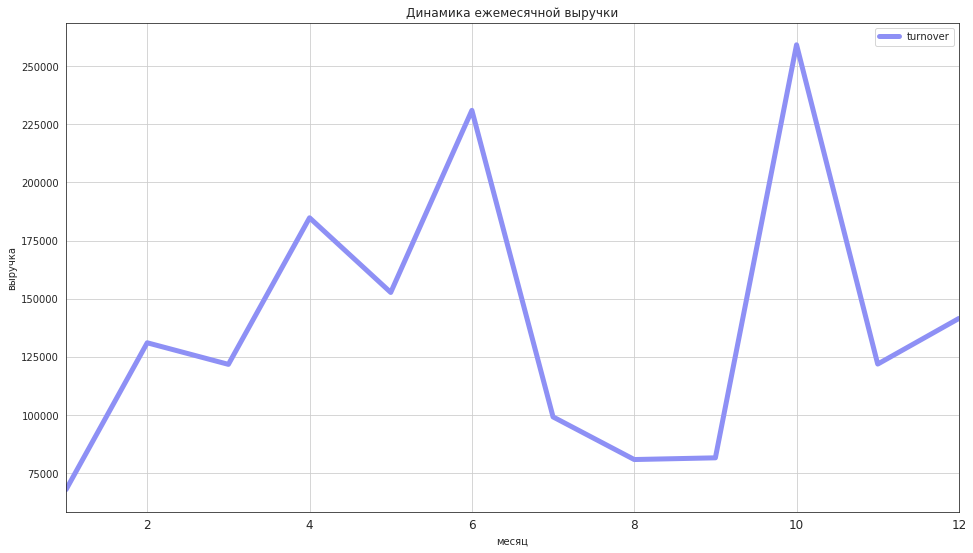

In [113]:
plt.figure(figsize=(16,9))
month_turnover.plot(kind='line', x = 'month', y='turnover', title='Динамика ежемесячной выручки', 
                   figsize=(16, 9), color='#8e90f5', linewidth=5.00, legend=True, grid=True)
sns.set_style("whitegrid")
plt.xlabel("месяц")
plt.ylabel("выручка")
plt.tick_params(axis='x', labelsize = 12, labelrotation=360)


Как и с количеством товара есть сезонные пики - июнь (225 тыс.) и октябрь (250 тыс.). На 3-м месте апрель, т.к. по количеству товара он не был в лидерах. Возможно, в качестве подарков покупают более дорогие товары, которые при меньшем количестве дают высокие объемы выручки. Падение ниже среднего (139 тыс.) почти в 2 раза также в январе, августе и сентябре.

Найдем среднюю выручку в неделю и ее динамику

In [114]:
week_turnover = data_clean.groupby(['week']).agg({'turnover':'sum'}).reset_index()
print(f'Средняя выручка в неделю:', week_turnover['turnover'].mean())
display(week_turnover.head())

Средняя выручка в неделю: 32181.365384615383


,week,turnover
0,1,9940.0
1,2,21116.0
2,3,11297.0
3,4,16116.0
4,5,16032.0


<Figure size 1152x648 with 0 Axes>

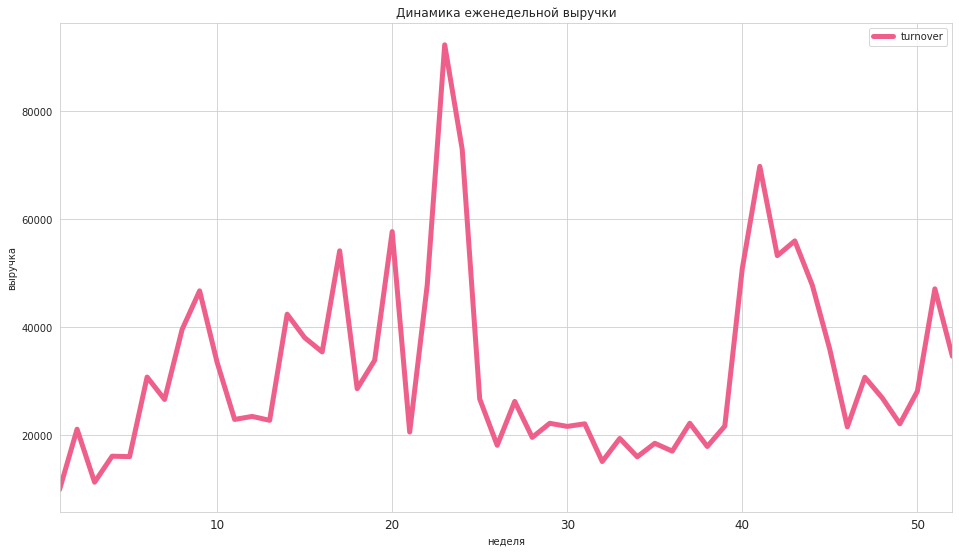

In [59]:
plt.figure(figsize=(16,9))
week_turnover.plot(kind='line', x = 'week', y='turnover', title='Динамика еженедельной выручки', 
                   figsize=(16, 9), color='#ee608b', linewidth=5.00, legend=True, grid=True)
sns.set_style("whitegrid")
plt.xlabel("неделя")
plt.ylabel("выручка")
plt.tick_params(axis='x', labelsize = 12, labelrotation=360)

Наблюдаются сезонные пики до 90 000 р. в неделю - это больше ежемесячной выручки. Основной диапазон выручки - 20-60 тыс. при средней недельной выручке 32 тыс.

Рассмотрим соотношение уникального товара и выручки.

In [115]:
product_turnover = product_quantity.sort_values(by='turnover', ascending=False)
display(product_turnover)

,product,quantity,turnover,price
1356,Сумка-тележка 2-х колесная Gimi Argo красная,70.0,76090.0,[1087.0]
1357,Сумка-тележка 2-х колесная Gimi Argo синяя,61.0,65281.0,"[1049.0, 1087.0]"
1453,Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт,79.0,16590.0,[210.0]
864,Пеларгония розебудная Red Pandora укорененный черенок,94.0,12670.0,"[135.0, 134.0, 149.0]"
839,Пеларгония зональная диам. 12 см сиреневый полумахровый,71.0,12284.0,"[150.0, 188.0, 169.0]"
...,...,...,...,...
880,Петрушка Итальянский гигант 2 г 4660010776553,1.0,10.0,[10.0]
621,Морковь Детская сладость 2 г 4660010775921,1.0,10.0,[10.0]
746,"Незабудка смесь 0,1 г 4650091480340",1.0,10.0,[10.0]
235,"Горох Амброзия 10,0 г 4660010772616",1.0,9.0,[9.0]


Больше всего выручки принесла продажа товара - Сумка-тележка 2-х колесная Gimi Argo красная (76 090 рублей), Сумка-тележка 2-х колесная Gimi Argo синяя (65 281 рублей) и Тагетис крупноцветковый рассада однолетних цветов (16 590). 
Меньше всего - семена гороха и львиного зева - по 9 рублей за весь год.

Разделим выручку на диапазоны.

In [116]:
turnover_range = pd.qcut(product_turnover['turnover'], 3).value_counts()
display(turnover_range)

(719.333, 76090.0]    641
(198.333, 719.333]    641
(8.999, 198.333]      641
Name: turnover, dtype: int64

Проведем АВС анализ по объему выручки

- А -самый высокий объем выручки - 719-76 090 рублей
- В -средний объем выручки - 198-718 рублей
- С -самый низкий объем выручки - 9-197 рублей

In [117]:
A_turnover = product_turnover.query('turnover > 719')
A_turnover_count = A_turnover['turnover'].count()
A_turnover_mean = A_turnover_count / product_turnover['turnover'].count()
display(f'Кол-во товаров в категории A по объему выручки: ', A_turnover_count)
display(f'Доля товаров в категории A по объему выручки: ', A_turnover_mean)

'Кол-во товаров в категории A по объему выручки: '

641

'Доля товаров в категории A по объему выручки: '

0.3333333333333333

In [118]:
B_turnover = product_turnover.query('turnover > 198 and turnover < 718')
B_turnover_count = B_turnover['turnover'].count()
B_turnover_mean = B_turnover_count / product_turnover['turnover'].count()
display(f'Кол-во товаров в категории В по объему выручки: ', B_turnover_count)
display(f'Доля товаров в категории В по объему выручки: ', B_turnover_mean)

'Кол-во товаров в категории В по объему выручки: '

639

'Доля товаров в категории В по объему выручки: '

0.33229329173166927

In [119]:
C_turnover = product_turnover.query('turnover < 197')
C_turnover_count = C_turnover['turnover'].count()
C_turnover_mean = C_turnover_count / product_turnover['turnover'].count()
display(f'Кол-во товаров в категории C по объему выручки: ', C_turnover_count)
display(f'Доля товаров в категории C по объему выручки: ', C_turnover_mean)

'Кол-во товаров в категории C по объему выручки: '

641

'Доля товаров в категории C по объему выручки: '

0.3333333333333333

Все категории разделены по выручке равномерно - по 33%

b) **_проанализируем категории АВС, выбранные по количеству, на предмет выручки._**

Посмотрим, как в каждой группе по количеству распределены категории по выручке.

In [120]:
display(A_quantity['turnover'].value_counts(ascending=False))

152.0     11
304.0     8 
840.0     7 
480.0     7 
600.0     7 
         .. 
1048.0    1 
418.0     1 
740.0     1 
450.0     1 
2184.0    1 
Name: turnover, Length: 385, dtype: int64

В категории А есть товары из всех трех групп. Больше всего, из средней категории В. Обозначим эту категорию АВ

In [121]:
display(B_quantity['turnover'].value_counts(ascending=False))

114.0     17
90.0      13
180.0     12
76.0      10
240.0     10
          ..
2354.0    1 
1437.0    1 
554.0     1 
658.0     1 
463.0     1 
Name: turnover, Length: 209, dtype: int64

 В категории В преимущественно товары из категории С. Обозначим категорию ВС.

In [122]:
display(C_quantity['turnover'].value_counts(ascending=False))

120.0     42
38.0      30
188.0     29
187.0     19
112.0     18
          ..
802.0     1 
232.0     1 
697.0     1 
1214.0    1 
1207.0    1 
Name: turnover, Length: 155, dtype: int64

В категории С также товары из категории С по выручке. Пока обозначим категорию СС, но необходимо посчитать общую выручку.

Узнаем общую выручку для каждой группы и выработаем   рекомендации 

Сравним динамику выручки в каждой количественной группе помесячно.

Для этого построим таблицы по каждой группе, которые потом объединим в одну общую.

In [123]:
month_turnover_A = data_clean.query('quantity >= 4').groupby(['month']).agg({'turnover':'sum'}).reset_index()

In [124]:
month_turnover_B = data_clean.query('quantity >= 2 and quantity <= 3').groupby(['month']).agg({'turnover':'sum'}).reset_index()

In [125]:
month_turnover_C = data_clean.query('quantity == 1').groupby(['month']).agg({'turnover':'sum'}).reset_index()


Соединим все таблицы и переименуем столбцы.

In [126]:
month_turnover_ABC = month_turnover_A.merge(month_turnover_B, on='month').merge(month_turnover_C, on='month')

In [127]:
month_turnover_ABC = month_turnover_ABC.rename(columns={"turnover_x":"turnover_A", "turnover_y":"turnover_B", "turnover":"turnover_C"})
                                         

In [128]:
display(month_turnover_ABC)

,month,turnover_A,turnover_B,turnover_C
0,1,5719.0,8814.0,53422.0
1,2,21720.0,12513.0,96819.0
2,3,20128.0,15300.0,86347.0
3,4,29073.0,28994.0,126720.0
4,5,21149.0,20669.0,110873.0
5,6,13343.0,21293.0,196338.0
6,7,14356.0,10519.0,74310.0
7,8,11361.0,6520.0,62982.0
8,9,6819.0,6383.0,68395.0
9,10,27596.0,31048.0,200503.0


Строим график динамики выручки по категориям.

<Figure size 1152x648 with 0 Axes>

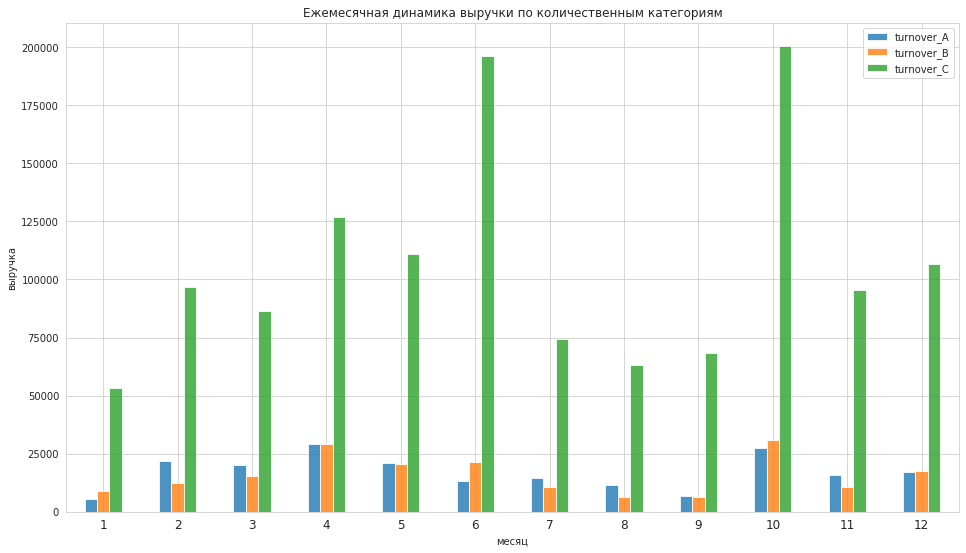

In [129]:
plt.figure(figsize=(16,9))
month_turnover_ABC.plot(kind='bar', x='month', title='Ежемесячная динамика выручки по количественным категориям', figsize=(16,9), grid=True, alpha=0.8) 
sns.set_style("whitegrid")
plt.xlabel("месяц")
plt.ylabel("выручка")
plt.tick_params(axis='x', labelsize = 12, labelrotation=360)

Категория С (кол-во товаров - по 1 шт.) лидирует по выручке, повторяет сезонность с пиком в октябре, июне, апреле, где превышает среднюю выручку. Категория В ниже ср.выручки, повторяет динамику сезонности, с пиком продаж в октябре, апреле, октябре и июне.
Аналогично категория А с пиками в апреле октябре и феврале находится в диапазоне от 5 000 до 29 000. Можно сделать вывод, что в единичном количестве товар реализуется лучше и приносит больше прибыли, возможно, за счет широкого ассортимента. Но категорию А стоит развивать, т.к. товары проданные в количестве от 4 до 112 штук вносят ощутимый вклад в общую выручку. Стоит детально рассмотреть товары, проданные в количестве 2-3 шт., т.к. несмотря на ср.количество они принесли меньше прибыли, чем товар, проданный по 1 шт.

Посчитаем общую выручку  и ее долю по каждой категории и построим круговую диаграмму.

In [130]:
month_turnover_ABC.sum()

month         78.0     
turnover_A    204212.0 
turnover_B    190317.0 
turnover_C    1278902.0
dtype: float64

Text(0.5, 1.0, 'Доля общей выручки по количественным категориям')

<Figure size 1152x648 with 0 Axes>

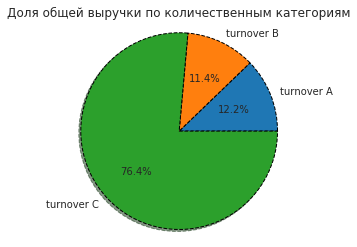

In [131]:
plt.figure(figsize=(16,9))
vals = [204212, 190317, 1278902]
labels = ["turnover A", "turnover B", "turnover C"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля общей выручки по количественным категориям')


76.4% выручки приносит категория С, 12.2% - категория А, 11.4% - категория В. Следует детально рассмотреть ассортимент В, возможно сократить ее ассортимент и продолжать развивать категорию С с целью довести объем выручки до 80%. Категорию А  следует увеличить до 19%.

c) рекомендации по оптимизации ассортимента, классифицированного по количеству проданного товара и полученной выручке.

Мы присвоили количественным категориям АВС такие же категории по выручке.

Категория АВ - товары с высоким показателем по количеству продаж и средним по выручке. Необходимо контролировать данную категорию и не снижать показатели, а также проводить мониторинг у конкурентов. Следует повышать уровень ежемесячной ср.выручки.

Категория ВС - товары со средним уровнем оборачиваемости и низким объемом выручки. Необходимо либо перевести данные товары в категорию СС, увеличивая объем выручки путем продвижения товара и тем самым поднять объем категории С до 80%.

Категория СА - товары продаются по 1 шт. и каждый из них приносит немного прибыли. Возможно, они служат для привлечения узкой категории клиентов и для создания статуса уникальности ассортимента. Тем не менее, в общем количестве данные товары принесли больше всего выручки, т.е. магазин взял объемом различных недорогих товаров, но, может быть, в чем-то уникальных. Если такова была стратегия продаж, от в отношении выручки она сработала.


__4). Классификация ассортимента по количеству заказов:__

a) ср.количество заказов и их распределение по дням, месяцам или сезонам


In [132]:
total_customer_quantity = data_clean['customer_id'].nunique()
display(f'Общее количество покупателей:', total_customer_quantity)

'Общее количество покупателей:'

1913

In [139]:
total_order_quantity = data_clean['order_id'].nunique()
display(f'Общее количество заказов:', total_order_quantity)

'Общее количество заказов:'

2159

In [140]:
mean_order = (total_order_quantity / total_customer_quantity)
display(f'Среднее количество заказов на пользователя:', mean_order)

'Среднее количество заказов на пользователя:'

1.1285938316779927

In [135]:
order_month_quantity = data_clean.groupby(['month']).agg({'order_id':'count'}).reset_index()
print(f'Среднее количество заказов в месяц:', order_month_quantity['order_id'].mean())
display(order_month_quantity)

Среднее количество заказов в месяц: 179.91666666666666


,month,order_id
0,1,119
1,2,221
2,3,193
3,4,222
4,5,148
5,6,131
6,7,151
7,8,136
8,9,139
9,10,335


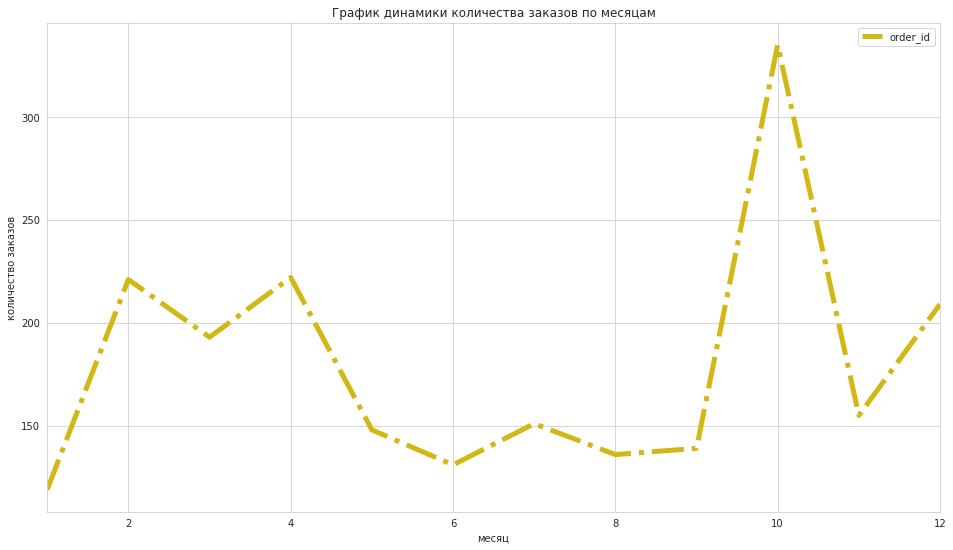

In [136]:
order_month_quantity.plot(kind='line', x='month', title='График динамики количества заказов по месяцам', figsize=(16, 9), linewidth=5.00, linestyle='-.', color='#d2b715', legend=True)
sns.set_style("whitegrid")
plt.xlabel("месяц")
plt.ylabel("количество заказов")
plt.tick_params(axis='x', labelsize = 10, labelrotation=360)


В сезонные пики - октябрь, февраль, апрель - количество заказов достигает 220-350 в месяц, в июне-августе и январе количество падает ниже среднего - 180.

Минимальное кол-во заказов в день:  0
Ср.кол-во заказов в день:  5.50765306122449


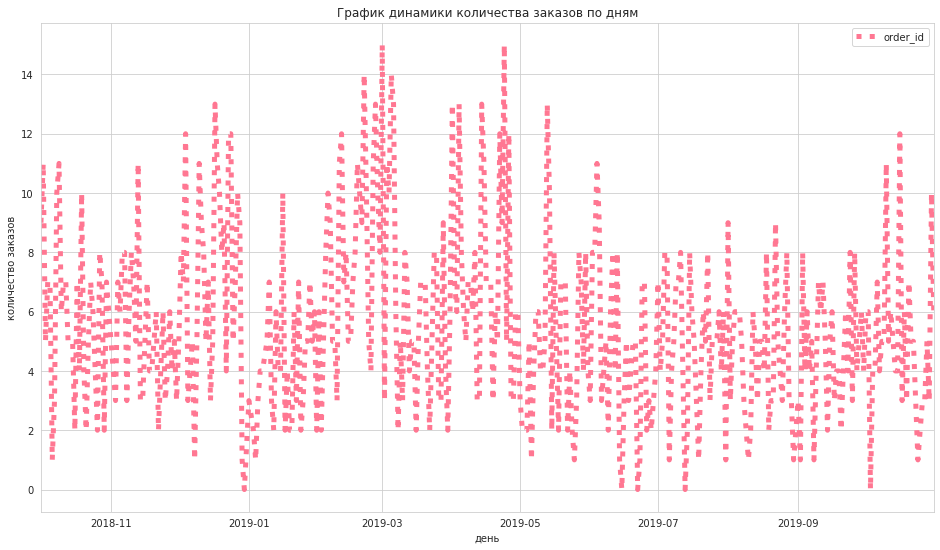

In [137]:
day_month_quantity = data_clean.groupby(['day']).agg({'order_id':'count'}).reset_index()
print(f'Минимальное кол-во заказов в день: ', day_month_quantity['order_id'].min())
print(f'Ср.кол-во заказов в день: ', day_month_quantity['order_id'].mean())
day_month_quantity.plot(kind='line', x='day', title='График динамики количества заказов по дням', figsize=(16, 9), linewidth=5.00, linestyle=':', color='#ff7792', legend=True)
sns.set_style("whitegrid")
plt.xlabel("день")
plt.ylabel("количество заказов")
plt.tick_params(axis='x', labelsize = 10, labelrotation=360)


Заказы поступают от 0 до 10 в день. В среднем поступает 5 заказов в день. В сезон от 2 до 14 заказов.

b) какова структура среднего чека, т.е. суммы выручки всех совершенных клиентами покупок за определенный период времени, деленная на количество чеков/заказов за тот же период.  


In [145]:
average_bill = total_turnover / total_order_quantity
display(f'Средний чек за весь период: ', average_bill)

'Средний чек за весь период: '

775.0954145437703

Найдем самый крупный/мелкий заказ за весь период

In [141]:
order_quantity = data_clean.groupby(['order_id']).agg({'turnover':'sum'}).reset_index()
display(order_quantity.sort_values(by='turnover', ascending=False))

,order_id,turnover
1142,70537.0,1288.0
341,68553.0,1281.0
1607,71770.0,1275.0
514,68930.0,1275.0
948,70095.0,1275.0
...,...,...
1555,71634.0,14.0
285,14932.0,11.0
23,14512.0,11.0
111,14655.0,11.0


Самый крупный заказ по выручке составил 1 288, а мелкий -  9 рублей. При этом, средний чек составляет 775 рублей.

c) сравним ср. чек по количественным категориям, предварительно посчитав количество заказов

In [142]:
order_quantity_A = data_clean.query('quantity >= 4').groupby(['order_id']).agg({'turnover':'sum'}).reset_index()
total_order_quantity_A = order_quantity_A['order_id'].count()
turnover_order_quantity_A =  order_quantity_A['turnover'].sum()
print(f'Кол-во заказов в количественной категории А: ', total_order_quantity_A)
print(f'Доля заказов в количественной категории А: ', total_order_quantity_A / total_order_quantity)
print(f'Ср.чек количественной категории А: ', turnover_order_quantity_A / total_order_quantity_A)

Кол-во заказов в количественной категории А:  233
Доля заказов в количественной категории А:  0.1079203334877258
Ср.чек количественной категории А:  552.9356223175965


In [143]:
order_quantity_B = data_clean.query('quantity >= 2 and quantity <= 3').groupby(['order_id']).agg({'turnover':'sum'}).reset_index()
total_order_quantity_B = order_quantity_B['order_id'].count()
turnover_order_quantity_B = order_quantity_B['turnover'].sum()
print(f'Кол-во заказов в количественной категории B: ', total_order_quantity_B)
print(f'Доля заказов в количественной категории B: ', total_order_quantity_B / total_order_quantity)
print(f'Ср.чек количественной категории B: ', turnover_order_quantity_B / total_order_quantity_B)

Кол-во заказов в количественной категории B:  275
Доля заказов в количественной категории B:  0.12737378415933304
Ср.чек количественной категории B:  401.3309090909091


In [144]:
order_quantity_C = data_clean.query('quantity == 1').groupby(['order_id']).agg({'turnover':'sum'}).reset_index()
total_order_quantity_C = order_quantity_C['order_id'].count()
turnover_order_quantity_C = order_quantity_C['turnover'].sum()
print(f'Кол-во заказов в количественной категории C: ', total_order_quantity_C)
print(f'Доля заказов в количественной категории C: ', total_order_quantity_C / total_order_quantity)
print(f'Ср.чек количественной категории C: ', turnover_order_quantity_C  / total_order_quantity_C )

Кол-во заказов в количественной категории C:  1651
Доля заказов в количественной категории C:  0.7647058823529411
Ср.чек количественной категории C:  429.633555420957


На градация ср.чека влияет показатели выручки и количества заказов в группе: категория А - самый высокий ср.чек 552 р., самый низкий у категории В - 401, средний у категории С - 429, при этом, ср.чек 2-х последних категорий ниже среднего по всему ассортименту. Кроме большого количества товаров с высокой выручкой, в категории А меньше всего заказов (233), поэтому ср.чек такой высокий. В категории С помимо самой большой выручки и самое большое количество заказов, поэтому ср.чек средний согласно логике

В целом, классифицировали весь ассортимент с позиции АВС-анализа по следующим критериям:

- количество проданного товара (шт.): А(4-112), В(2-3), С(1);
- выручка за каждый товар (р. за весь период): А(719-76 090), В(198-718), С(9-197);
- цена товара (р. за 1 шт.): А(300-1 275), В(120-299), С(9-119).


Приняв решение, отталкиваться от категоризации по количеству продаж классифицировали данные категории по основным фин.показателям.

Категории по количеству товара АВС рассмотрели по показателям:

- выручки: А(204 212/12%), В(190 317/11%), С(1 278 902/76%);
- цены: А(38-120), В(22-164, от 300), С(38-188, от 600);
- ср.чека: А(552), В(401), С(429);
- заказов: А(233/10%), В(275/13%),С(1 651/76%).

Категория А - это  средняя по числу уникальных товаров категория (553/29%), где находятся самые часто продаваемые и дешевые товары, с самым высоким ср.чеком, средней выручкой, но самым небольшим количеством заказов.

Категория В - самая небольшая по числу товаров категория (513/27%): нормально продаваемые товары с дешевой и средней ценой, с маленьким ср.чеком, маленькой выручкой и ср.кол-вом заказов.

Категория С - самая крупная по числу товаров категория (854/44%): реже всего продаваемые товары всех ценовых категорий, с нормальным ср.чеком, самими большими выручкой и кол-вом заказов.

* Флагман товарного ассортимента это категория С, т.к. приносит больше всего выручки, хотя продается штучно. Необходимо строго периодично поддерживать такой широкий ассортимент и постоянно его обновлять. Повысить выручку до 80%.
* Категорию В пересмотреть, часть товаров перевести в С, часть удалить из ассортимента. 
* Категория А в хорошем состоянии, необходимо увеличивать объем выручки до 19%, а также строго следить за поставками, т.к. данный товар продается в больших количествах.

<a id="hypothesis"></a>
### 3. Проверка статистических гипотез

**1).	Проверим гипотезу о соответствии ср.чека** товаров категории С (менее продаваемых) ср.чеку категории В (нормально продаваемых).

Для проверки гипотезы применим непараметрический тест Уилкоксона-Манна-Уитни, который проранжирует две выборки по порядку от меньшего к большему и сравнит ранги одних и тех же значений, попавших в обе выборки. Типичный сдвиг - разница между рангами одних и тех же значений одинакова. Нетипичный сдвиг по рангу - изменение. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.

Перед проверкой найдем арифметическую разницу между ср.чека категории С и категории В. 

In [146]:
print('Разница ср.чека: ', "{0:.3f}".format((turnover_order_quantity_C / total_order_quantity_C) / (turnover_order_quantity_B / total_order_quantity_B)- 1))


Разница ср.чека:  0.071


Проверим гипотезу, что средние чеки обеих категорий С и В равны друг другу.

Формируем нулевую гипотезу:

H₀ = "ср.чек категории С равен ср.чеку категории В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "ср.чек категории С не равен ср.чеку категории В. 
Уровень статистической значимости установим 5%.


In [155]:
alpha = .05

sampleB = order_quantity_B['turnover']
sampleC = order_quantity_C['turnover']

results = stats.mannwhitneyu(sampleB, sampleC)
    
print('p-значение: ', "{0:.3f}".format(results.pvalue))
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима'")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.432
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value ниже уровня значимости 0.05, поэтому 'не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'. 
Средний чек категории С выше ср.чека категории В на 7%, что статистически не значимо.


**2).	Проверить гипотезу о соответствии доли заказов** категории А(самых продаваемых) доле заказов категории В (нормально продаваемых).

Нам необходимо проверить гипотезу о равенстве долей. Если некоторая доля генеральной совокупности обладает признаком, а другая её часть — нет, об этой доле можно судить по выборке из генеральной совокупности. Выборочные доли будут нормально распределены вокруг настоящей.

Предварительно найдем кол-во заказов и их доли, а также проверим разницу в долях заказов

In [154]:
print(f'Общее кол-во заказов: ', total_order_quantity)
print(f'Кол-во заказов в количественной категории А: ', total_order_quantity_A)
print(f'Доля заказов в количественной категории А: ', total_order_quantity_A / total_order_quantity)
print(f'Кол-во заказов в количественной категории B: ', total_order_quantity_B)
print(f'Доля заказов в количественной категории B: ', total_order_quantity_B / total_order_quantity)
print('Разница в доле заказов: ', "{0:.3f}".format((total_order_quantity_B / total_order_quantity) -  (total_order_quantity_A / total_order_quantity)))


Общее кол-во заказов:  2159
Кол-во заказов в количественной категории А:  233
Доля заказов в количественной категории А:  0.1079203334877258
Кол-во заказов в количественной категории B:  275
Доля заказов в количественной категории B:  0.12737378415933304
Разница в доле заказов:  0.019


Проверим гипотезу, что доли заказов обеих категории А и В равны друг другу.

Формируем нулевую гипотезу: H₀ = "доля заказов категории А равна доле заказов категории В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "доля заказов категории А не равна доле категории В". 

Уровень статистической значимости установим 5%.

In [149]:
alpha = .05 

successes = np.array([228, 326])
trials = np.array([2007, 2007])

p1 = successes[0]/trials[0]
p2 = successes[1]/trials[1]

p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
difference = p1 - p2
display(difference)


-0.04882909815645241

Если доли были бы равны, то разница между ними должна была быть равна нулю. Считаем статистику в стандартных отклонениях стандартного нормального распределения с заданными параметрами (среднее 0, ст.отклонение 1)
Проверим статистическую разницу z-критерием.


In [150]:
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
distr = st.norm(0, 1)
display(z_value)

-4.484580539532629

Так как распределение статистики нормальное, вызовем метод cdf(). Тест двусторонний, поэтому возьмем статистику по модулю методом abs() и удваиваем результат

In [152]:
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")


p-значение:  7.3057508045426545e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


p-value ниже уровня значимости 0.05, поэтому 'отвергаем нулевую гипотезу: между долями есть значимая разница'. 

Мы получили подтверждение, что доли заказов категорий А и В статистически не равны, хотя разница между ними только 2%. 
Мы указываем, что различия достоверны на 5%-ом уровне значимости, т.е. вероятность того, что они все-таки недостоверны, составляет 0,05.

<a id="output"></a>
### 4. Общий вывод

Проанализировав данные по товарному ассортименту интернет-магазина товаров для дома и быта «Пока все ещё тут» за период 01.10.2018-31.10.2019 мы пришли к следующим выводам:

**1. Исследовательских анализ данных.**

a) Количество товара:
- общее кол-во проданного товара: 9 719;
- кол-во уникальных товаров: 2 342;
- ср.кол-во проданных товаров в месяц: 809;
- сезонные пики по кол-ву: июнь, апрель, октябрь

b) Цена товара:
- диапазон цен: от 9 до 1 275р. (18% самые дешевые, 19% самые дорогие);
- ср.цена: 127 р.;

c) Выручка:
- годовая выручка: 1 673 431 р.;
- ср.выручка в месяц: 139 452 р.;
- сезонные пики по выручке: октябрь, июнь, апрель

d) Заказы:
- общее кол-во заказов: 2 159;
- общее кол-во покупателей: 1 913;
- ср.кол-во заказов на одного покупателя: 1,1
- ср.кол-во заказов в месяц: 180;
- диапазон стоимости заказов: 9-1 288 р.;
- ср.чек: 775 р.;
- сезонные пики по заказам: октябрь, февраль, апрель

e) Хиты продаж:
- по кол-ву: 'стяжка оконная' - 112 штук;
- по выручке: 'сумка-тележка Gimi Argo' - 76 090 рублей;

f) Аутсайдеры продаж:
- по кол-ву: 'подставка для цветов' - 1 шт;
- по выручке: 'семена львиного зева' - 9 рублей 

**2. Анализ товарного ассортимента**

Мы классифицировали весь ассортимент с позиции АВС-анализа по следующим критериям (**в скобках диапазон категорий в соответствующих единицах):**

- количество проданного товара (шт.): А(4-112), В(2-3), С(1);
- выручка за каждый товар (р. за весь период): А(719-76 090), В(198-718), С(9-197);
- цена товара (р. за 1 шт.): А(300-1 275), В(120-299), С(9-119).

Приняв решение сфокусироваться на  _категоризации по количеству продаж,_ классифицировали выбранные категории по основным финансовым и торговым показателям.

Категории по количеству товара АВС рассмотрели по показателям:

- выручки: А(204 212/12%), В(190 317/11%), С(1 278 902/76%);
- цены: А(38-120), В(22-164, от 300), С(38-188, от 600);
- ср.чека: А(552), В(401), С(429);
- заказов: А(233/10%), В(275/13%),С(1 651/76%).


**Категория А** - это  средняя по числу уникальных товаров категория (553/29%), где находятся самые часто продаваемые и дешевые товары, с самым высоким ср.чеком, средней выручкой, но самым небольшим количеством заказов.

**Категория В** - самая небольшая по числу товаров категория (513/27%): нормально продаваемые товары с дешевой и средней ценой, с маленьким ср.чеком, маленькой выручкой и ср.кол-вом заказов.

**Категория С** - самая крупная по числу товаров категория (854/44%): реже всего продаваемые товары всех ценовых категорий, с нормальным ср.чеком, самими большими выручкой и кол-вом заказов.

Можно сделать вывод, что данный магазин специализируется на штучных, но недорогих товарах, поэтому представлен такой широкий ассортимент, где каждый покупатель найдет что-то для себя даже в единичном экземпляре. 

**3. Рекомендации**

__a) рекомендации по категориям АВС по количеству продаж:__

- Флагман товарного ассортимента это категория С, т.к. приносит больше всего выручки, хотя продается в единичных экземплярах. Необходимо строго периодично поддерживать такой широкий ассортимент и постоянно его обновлять. 
- Категорию В необходимо пересмотреть, какую-то часть товаров перевести в категорию С, часть удалить из ассортимента. По оставшемуся товару принять меры по усилению продвижения. 
- Категория А в хорошем состоянии, необходимо увеличивать объем выручки до 19%, а также строго следить за поставками, т.к. данный товар продается в больших количествах.

__b) дополнительные рекомендации по оптимизации ассортимента, классифицированного по количеству проданного товара и полученной выручке.__

Мы присвоили выбранным количественным категориям АВС такие же категории, но по выручке, и сопоставили два критерия.

* Категория АВ - товары с высоким показателем по количеству продаж и средним по выручке. Необходимо контролировать данную категорию и не снижать показатели, а также проводить мониторинг у конкурентов. Следует повышать уровень ежемесячной ср.выручки до общего показателя - 139 452 р.

* Категория ВС - товары со средним уровнем оборачиваемости и низким объемом выручки. Необходимо либо перевести данные товары в категорию СС, увеличивая объем выручки путем продвижения товара и тем самым поднять объем выручки категории С до 80% для соответствия принципу Парето.

* Категория СА - товары продаются по 1 шт. и каждый из них приносит немного прибыли. Возможно, они служат для привлечения узкой категории клиентов и для создания статуса уникальности ассортимента. Тем не менее, в общем количестве данные товары принесли больше всего выручки, т.е. магазин взял объемом различных недорогих товаров, но, может быть, в чем-то уникальных. Если такова была стратегия продаж, от в отношении выручки она сработала.

